In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin1')

In [30]:
data.columns = ['label', 'text', 'unused1', 'unused2', 'unused3']  # Adjust based on what you see

In [31]:
data = data[['label', 'text']]  # Keep only the relevant columns

In [32]:
data = data.dropna(subset=['label', 'text'])

In [33]:
print(data.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [34]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [36]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [37]:
nb = MultinomialNB()
log_reg = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(probability=True, kernel='linear', random_state=42)

In [38]:
print(data.isnull().sum())


label    0
text     0
dtype: int64


In [42]:
accuracies = {}


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy: 0.9668

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 0.9525

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0

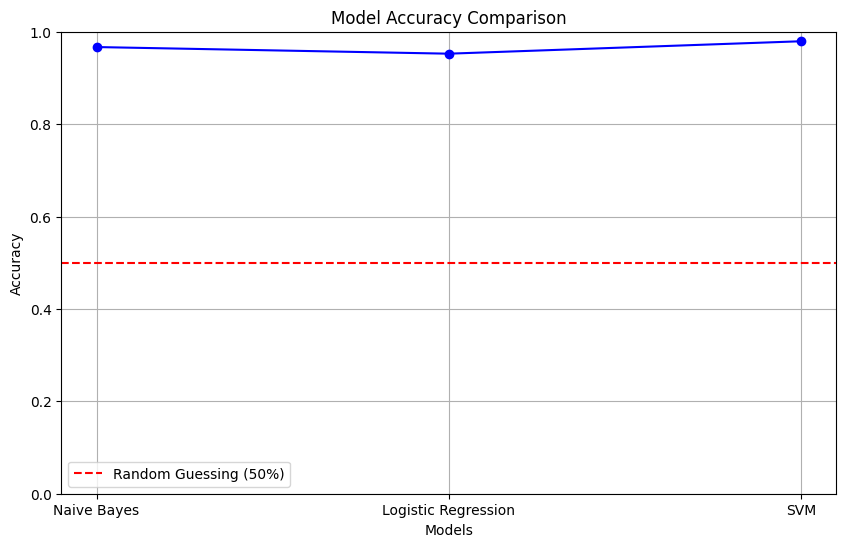

In [44]:
models = {'Naive Bayes': nb, 'Logistic Regression': log_reg, 'SVM': svm}
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")

# Plot accuracies using a line graph
plt.figure(figsize=(10, 6))
plt.plot(accuracies.keys(), accuracies.values(), marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set limits for y-axis
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', label='Random Guessing (50%)')
plt.legend()
plt.show()